# Liste Chainée

In [3]:
class Maillon:
    def __init__(self, data):
        self.data = data  
        self.next = None  

class ListeDeCourse:
    def __init__(self):
        self.head = None 

    def insererAuDebut(self, data):
        new_maillon = Maillon(data) 
        new_maillon.next = self.head 
        self.head = new_maillon      

    def afficher(self):
        temp = self.head
        while temp is not None:
            print(temp.data, end=" -> ")
            temp = temp.next
        print("None")

    def supprimerPremier(self):
        if self.head is not None:
            self.head = self.head.next
            
    def supprimerDernier(self):
        if self.head is None:
            return
        if self.head.next is None:
            self.head = None
            return
        temp = self.head
        while temp.next.next is not None:
            temp = temp.next
        temp.next = None

In [4]:
liste = ListeDeCourse()
liste.insererAuDebut("Pommes")
liste.insererAuDebut("Bananes")
liste.insererAuDebut("Carottes")

In [5]:
liste.afficher()

Carottes -> Bananes -> Pommes -> None


# Arbre

In [6]:
class NoeudBinaire:
    def __init__(self, valeur, parent=None, gauche=None, droite=None):
        self.valeur = valeur
        self.parent = parent
        self.gauche = gauche
        self.droite = droite
    def __repr__(self):
        return f"NoeudBinaire({self.valeur})"

In [7]:
noeud_a = NoeudBinaire("A")
noeud_b = NoeudBinaire("B", parent=noeud_a)
noeud_c = NoeudBinaire("C", parent=noeud_a)
noeud_d = NoeudBinaire("D", parent=noeud_b)
noeud_e = NoeudBinaire("E", parent=noeud_b)
noeud_f = NoeudBinaire("F", parent=noeud_c)
noeud_g = NoeudBinaire("G", parent=noeud_e)
noeud_h = NoeudBinaire("H", parent=noeud_e)


In [8]:
noeud_a.gauche = noeud_b
noeud_a.droite = noeud_c
noeud_b.gauche = noeud_d
noeud_b.droite = noeud_e
noeud_c.gauche = noeud_f
noeud_e.gauche = noeud_g
noeud_e.droite = noeud_h

In [9]:
print("Racine :", noeud_a)
print("Enfant gauche de A :", noeud_a.gauche)
print("Enfant droit de A :", noeud_a.droite)
print("Enfants de E :", noeud_e.gauche, "et", noeud_e.droite)
print("Parent de F :", noeud_f.parent)

Racine : NoeudBinaire(A)
Enfant gauche de A : NoeudBinaire(B)
Enfant droit de A : NoeudBinaire(C)
Enfants de E : NoeudBinaire(G) et NoeudBinaire(H)
Parent de F : NoeudBinaire(C)


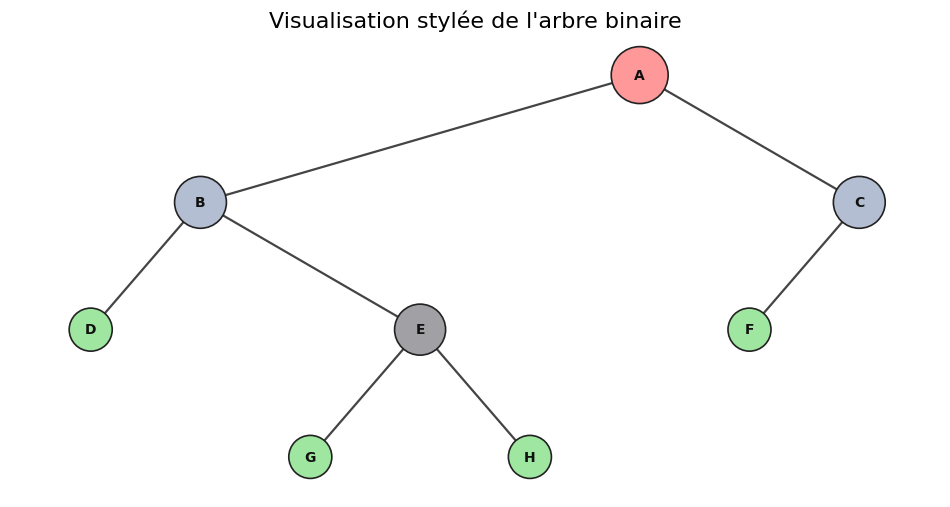

In [10]:
import networkx as nx

# Visualisation stylée de l'arbre binaire en utilisant networkx et matplotlib
import matplotlib.pyplot as plt

def afficher_arbre_style(root, figsize=(12, 6), node_size_base=1200):
    # Construire le graphe, positions (inorder pour x), et profondeurs
    G = nx.DiGraph()
    pos = {}
    depths = {}
    value_to_node = {}
    x_counter = [0]

    def traverse(node, depth=0):
        if node is None:
            return
        traverse(node.gauche, depth+1)
        value_to_node[node.valeur] = node
        G.add_node(node.valeur)
        pos[node.valeur] = (x_counter[0], -depth)  # y = -depth to have root on top
        depths[node.valeur] = depth
        x_counter[0] += 1
        if node.gauche:
            G.add_edge(node.valeur, node.gauche.valeur)
        if node.droite:
            G.add_edge(node.valeur, node.droite.valeur)
        traverse(node.droite, depth+1)

    traverse(root)

    # Styling: color leaves differently, highlight root, size based on depth
    colors = []
    sizes = []
    labels = {n: n for n in G.nodes()}
    max_depth = max(depths.values()) if depths else 0
    for n in G.nodes():
        node_obj = value_to_node[n]
        is_leaf = (node_obj.gauche is None and node_obj.droite is None)
        if n == root.valeur:
            colors.append("#ff9999")  # root color
            sizes.append(node_size_base * 1.4)
        elif is_leaf:
            colors.append("#9fe6a0")  # leaf color
            sizes.append(node_size_base * 0.8)
        else:
            # internal node - shade based on depth
            depth = depths[n]
            # deeper node -> lighter color
            ratio = depth / (max_depth + 1) if max_depth > 0 else 0
            # Interpolate color from light blue to darker blue
            r = int(200 - 80 * ratio)
            g = int(220 - 120 * ratio)
            b = int(255 - 180 * ratio)
            colors.append(f"#{r:02x}{g:02x}{b:02x}")
            sizes.append(int(node_size_base * (1.2 - 0.15 * ratio)))

    # Dessiner
    plt.figure(figsize=figsize)
    nx.draw_networkx_edges(G, pos, arrows=False, width=1.6, edge_color="#444444")
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, edgecolors="#222222", linewidths=1.2)
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold', font_color="#111111")
    plt.title("Visualisation stylée de l'arbre binaire", fontsize=16)
    plt.axis('off')
    plt.show()

# Appel de la fonction sur la racine existante (noeud_a)
afficher_arbre_style(noeud_a)